##Descarga  y descomprimido de archivos

In [9]:
##OPCION 1 - Descarga directa desde Kaggle
import requests
file_id= '12eH1Nl46DIC-iiYrUrU3FqIhBj0eMmky'
url = f'https://drive.google.com/uc?id=12eH1Nl46DIC-iiYrUrU3FqIhBj0eMmky'

response= requests.get(url)
open('kaggle.json', 'wb').write(response.content)

import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

!unzip udea*.zip > /dev/null
!wc *.csv

 55% 11.0M/20.1M [00:00<00:00, 111MB/s]
100% 20.1M/20.1M [00:00<00:00, 141MB/s]
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


#Carga del archivo train.csv

In [7]:
##OPCION 2 - Cargar el archivo train.csv desde google drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown

file_id='1EFM-jnbWsT2buCk6NjT_XAffz0oeVyLE'
url = f'https://drive.google.com/uc?id=1EFM-jnbWsT2buCk6NjT_XAffz0oeVyLE'

gdown.download(url, 'train.csv', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1EFM-jnbWsT2buCk6NjT_XAffz0oeVyLE
From (redirected): https://drive.google.com/uc?id=1EFM-jnbWsT2buCk6NjT_XAffz0oeVyLE&confirm=t&uuid=77796ef8-557f-43b6-96a2-f2f18b9b59fb
To: /content/train.csv
100%|██████████| 118M/118M [00:01<00:00, 91.7MB/s]


'train.csv'

In [10]:
#Lectura y muestra del csv
z = pd.read_csv('train.csv')
print("Tamaño del dataframe", z.shape)
z.head()

Tamaño del dataframe (692500, 12)


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


##Exploraciones

<Axes: xlabel='ESTU_PRGM_DEPARTAMENTO'>

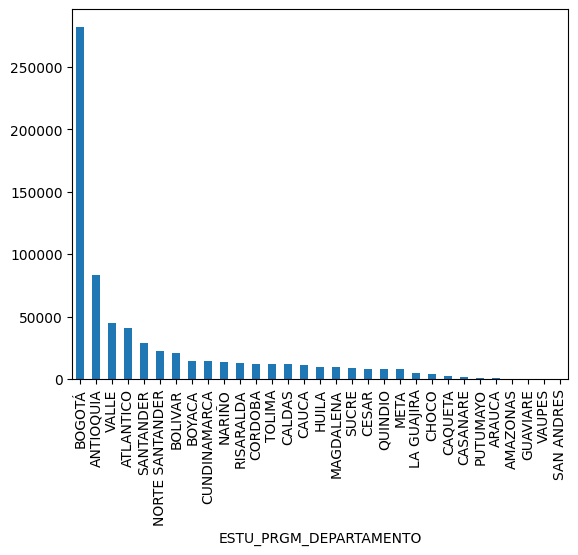

In [11]:
#Estudiantes por departamento
z.ESTU_PRGM_DEPARTAMENTO.value_counts().plot(kind='bar')

In [12]:
#Estudiantes de Bogotá
estu_bogota=z[z['ESTU_PRGM_DEPARTAMENTO']=='BOGOTÁ']
print("Tamaño del dataframe", estu_bogota.shape)
print("Hay ", len(estu_bogota), " estudiantes de Bogotá")
estu_bogota.head()
# Intentamos mostrar una gráfica según el programa académico
# pero debido a la gran cantidad de programas no se logra ver bien

Tamaño del dataframe (282159, 12)
Hay  282159  estudiantes de Bogotá


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 2,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,Si,medio-bajo
11,738026,20203,ADMINISTRACIÓN FINANCIERA,BOGOTÁ,Entre 500 mil y menos de 1 millón,Más de 30 horas,Estrato 2,Si,Educación profesional incompleta,Postgrado,No,medio-bajo
12,858669,20183,HOTELERIA Y TURISMO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Primaria completa,No,medio-bajo


In [13]:
#Estudiantes de Bogotá que estudian enfermería
estu_bogota_enfermeria=estu_bogota[estu_bogota['ESTU_PRGM_ACADEMICO']=='ENFERMERÍA']
print("Tamaño del dataframe", estu_bogota_enfermeria.shape)
print("Hay ", len(estu_bogota_enfermeria), " estudiantes de Bogotá que estudian enfermería")
estu_bogota_enfermeria.head()

Tamaño del dataframe (61, 12)
Hay  61  estudiantes de Bogotá que estudian enfermería


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
10326,667023,20195,ENFERMERÍA,BOGOTÁ,Entre 4 millones y menos de 5.5 millones,NaN,NaN,NaN,NaN,NaN,Si,medio-alto
14416,470625,20203,ENFERMERÍA,BOGOTÁ,Entre 4 millones y menos de 5.5 millones,Más de 30 horas,Estrato 3,Si,Educación profesional completa,Educación profesional completa,No,medio-alto
19992,3123,20212,ENFERMERÍA,BOGOTÁ,Entre 4 millones y menos de 5.5 millones,Menos de 10 horas,Estrato 3,Si,Educación profesional completa,Primaria incompleta,No,alto
26140,768594,20203,ENFERMERÍA,BOGOTÁ,Entre 4 millones y menos de 5.5 millones,Más de 30 horas,Estrato 2,Si,Primaria incompleta,Técnica o tecnológica completa,No,medio-alto
27744,485469,20195,ENFERMERÍA,BOGOTÁ,Entre 4 millones y menos de 5.5 millones,0,Estrato 3,Si,Técnica o tecnológica completa,Educación profesional completa,No,medio-bajo


In [14]:
#Estudiantes de Antioquia que estudian medicina
estu_antioquia_medicina=z[(z['ESTU_PRGM_DEPARTAMENTO']=='ANTIOQUIA') & (z['ESTU_PRGM_ACADEMICO']=='MEDICINA')]
print("Tamaño del dataframe", estu_antioquia_medicina.shape)
print("Hay ", len(estu_antioquia_medicina), " estudiantes de Antioquia que estudian medicina")
estu_antioquia_medicina.head()


Tamaño del dataframe (1933, 12)
Hay  1933  estudiantes de Antioquia que estudian medicina


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
187,446151,20183,MEDICINA,ANTIOQUIA,Más de 7 millones,0,Estrato 5,Si,Educación profesional completa,Educación profesional completa,No,alto
318,730652,20212,MEDICINA,ANTIOQUIA,Más de 7 millones,0,Estrato 5,Si,Postgrado,Postgrado,No,alto
351,725495,20195,MEDICINA,ANTIOQUIA,Menos de 500 mil,Menos de 10 horas,Estrato 2,Si,No Aplica,Primaria incompleta,No,alto
1358,6501,20203,MEDICINA,ANTIOQUIA,No pagó matrícula,Más de 30 horas,Estrato 4,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,alto
1611,711776,20212,MEDICINA,ANTIOQUIA,Más de 7 millones,0,Estrato 5,Si,Educación profesional completa,Técnica o tecnológica completa,No,medio-alto
